# Advisor Transaction Synthesis

We can synthesise RIA Transaction Data by randomly adding a specific RIA to each transaction. Then by aggregating the data we can predict which RIA's are better suited to each sector.

## Data Synthesis

In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Mock Data
n = 10000
values = random.choices(range(-93, 100), k=n)
field = random.choices(['Energy', 'Materials', 'Industrials', 'Utilities', 'Healthcare', 
    'Financials', 'Information Technology'],k=n)
RIA_assignment = random.choices(range(1,100) ,k=n)
names = ["RIA", "Sector", "Price"]
df = pd.DataFrame(list(zip(RIA_assignment,field,values)),columns=names)
#df

## Analysis

In [3]:
df2 = df.groupby(['RIA','Sector']).sum()

max = df2.groupby(['RIA'])['Price'].max().mean()
min = df2.groupby(['RIA'])['Price'].min().mean()
mean = df2.groupby(['RIA'])['Price'].mean().mean()
print("Max: ", max)
print("Min: ", min)
print("Mean: ", mean)

Max:  312.8686868686869
Min:  -244.35353535353536
Mean:  36.37950937950938


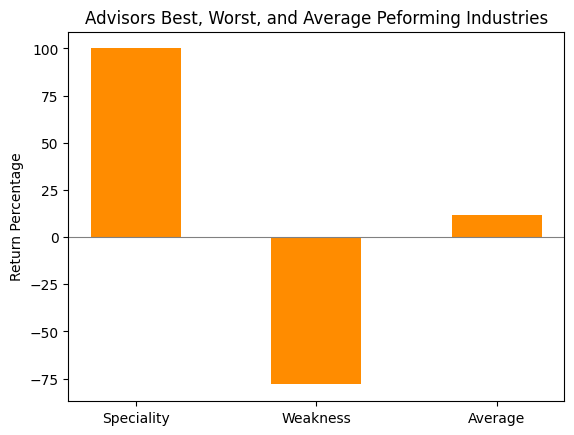

In [4]:
# Visualization
minp = min/max*100
meanp = mean/max*100
maxp = max/max*100

fig, ax = plt.subplots()
stats = [maxp, minp, meanp]
distance = [0, 1, 2]
labels = ['Max', 'Min', 'Mean']
width = .5
p1 = ax.bar(distance, stats, width=width, color = 'darkorange')

ax.axhline(0, color='grey', linewidth=0.8)
ax.set_ylabel('Return Percentage')
ax.set_title('Advisors Best, Worst, and Average Peforming Industries')
x_pos = np.arange(len(labels))

# Label with label_type 'center' instead of the default 'edge'
ax.set_xticks(x_pos, labels=["Speciality", "Weakness", "Average"])

plt.show()